Produire des slides ``` jupyter nbconvert Réanalyse\ SOSP.ipynb --to slides --post serve```

# Enquête sur la science ouverte

**Reproductibilité de l'enquête SOSP - State of Open Science Practices in France**

Mariannig Le Béchec - Aline Bouchard - Philippe Charrier - Claire Denecker - Gabriel Gallezot - Stéphanie Rennes


Présentation : https://www.ouvrirlascience.fr/state-of-open-science-practices-in-france-sosp-fr/

DOI : https://dx.doi.org/10.52949/5

- Rapport : https://hal.archives-ouvertes.fr/hal-03545512v1
- Données : https://zenodo.org/record/5827206


## Objectifs 

1. Rendre les données "vivantes"
2. Refaire des traitements statistiques
3. Produire de nouveaux traitements/visualisations (par exemple : qui utilise R & Python)
4. Justifier l'usage de Python pour faire tout ça !

### Point de départ 

Les données sont disponibles sur un dépôt et téléchargeable. Je dois ensuite me débrouiller.

## 1. Rendre les données "vivantes"

- Téléchargement des données
- Création d'un nouveau répertoire dédié
- Création d'un nouveau Notebook Jupyter -> on pourra en discuter

## 1.1 Charger les données

Utilisation de la bibliothèque Pandas

In [1]:
import pandas as pd
data = pd.read_csv("data/SOSP_Export_base de données diffusable.csv")
data.head()

,Id,contexte_travail,fonction_recherche,statut_professionnel,statut_professionnel_Autre,annee_premiere_publi,Systeme_exploitation,Usage_telephone_mobile,Outils_gestion_travail_av_confinement_visioconférence,Outils_gestion_travail_av_confinement_planification_RDV,...,Souhait_partage_donnees_produites_discipline,Souhait_partage_donnees_produites_pays_continent,Souhait_partage_donnees_produites_domaine_economique,Souhait_partage_donnees_produites_secteur_associatif,Souhait_partage_donnees_produites_sans_restriction,compatibilite_diffusion_partage,evolutions_pratiques_numeriques,sexe,disciplines_9niv,annee_de_naissance-recod10niv
0,1,nous sommes entre 6 et 10 personnes,professeur / professeure des universités et as...,fonctionnaire ou assimilé,NaN,1995,Windows,rarement,parfois,souvent,...,oui,oui,oui,oui,oui,oui,je ne sais pas,un homme,Sciences humaines,61 à 65 ans
1,2,nous sommes plus de 50 personnes,ingénieur / ingénieure de recherche,en CDI,NaN,2005,Windows,rarement,parfois,parfois,...,oui,oui,oui,oui,oui,NaN,NaN,un homme,Médecine,46 à 50 ans
2,3,nous sommes entre 2 et 5 personnes,maître / maîtresse de conférences et assimilés,fonctionnaire ou assimilé,NaN,2006,Windows,parfois,rarement,souvent,...,oui,oui,oui,oui,oui,"oui, tout est dans la chronologie",non,un homme,Médecine,36 à 40 ans
3,4,nous sommes entre 2 et 5 personnes,"directeur / directrice de recherche (CNRS, INS...",fonctionnaire ou assimilé,NaN,1989,Windows;autres OS (Android...),souvent,rarement,souvent,...,oui,oui,non,non,non,Oui,Aucune idée,une femme,Médecine,56 à 60 ans
4,5,nous sommes entre 2 et 5 personnes,doctorant / doctorante (y compris CIFRE),en CDD,NaN,2015,MacOS,souvent,rarement,parfois,...,oui,oui,oui,oui,oui,Oui,Oui,une femme,Médecine,31 à 35 ans


Pendant que nous y sommes, chargeons les méta-données pour créer un dictionnaire des questions

In [2]:
questions = pd.read_csv("data/SOSP_metadonnees_variables.csv")
questions = questions[31:] # le tableau ne commence qu'à la ligne 31
dic_questions = dict(questions.set_index("Titre")["Listes des variables avec les questions et modalités associées"])
questions

,Titre,Listes des variables avec les questions et modalités associées,Unnamed: 2,Unnamed: 3,Unnamed: 4
31,ID,NaN,NaN,A,Identifiant de l’observé
32,contexte_travail,"Habituellement, pour une opération de recherch...",je travaille seul nous sommes entre 2 et 5 p...,B,NaN
33,fonction_recherche,Quelle est votre fonction dans la recherche ?,doctorant / doctorante (y compris CIFRE) maî...,C,NaN
34,statut_professionnel,Quel est votre statut professionnel ?,Fonctionnaire ou assimilé en CDD en CDI po...,D,NaN
35,statut_professionnel_autre,"Si, autre pouvez-vous préciser ?",Question ouverte,E,NaN
...,...,...,...,...,...
157,compatibilite_diffusion_partage\n,34 - Le partage et la diffusion des données vo...,Question ouverte,DW,mots anonymisés sous forme de XXXXX
158,evolutions_pratiques_numeriques,"35 - Selon vous, vos pratiques numériques vont...",Question ouverte,DX,mots anonymisés sous forme de XXXXX
159,sexe,Quel est votre genre ?,Une femme Un homme Je ne souhaite pas répondre,DY,NaN
160,Disciplines_9niv,Quelle est votre discipline principale de rech...,Sciences de l'ingénieur Sciences humaines\nSc...,DZ,recodage en 9 disciplines


## 1.2 Petite exploration des données

Encore une fois, Pandas est utile ... C'est le moment où on explore

In [3]:
data["sexe"].value_counts()

un homme                       565
une femme                      480
je ne souhaite pas répondre     44
Name: sexe, dtype: int64

Tout peut se faire avec Pandas. Il est possible d'avoir des outils plus spécifiques pour simplifier (comme PySHS)

In [4]:
#pip install pyshs
import pyshs

In [5]:
pyshs.tri_a_plat(data,"disciplines_9niv")

,Effectif,Pourcentage (%)
"Chimie, Matériaux",59.0,5.5
Lettres et Arts,58.0,5.4
"Mathématiques, Informatiques",138.0,12.8
Médecine,54.0,5.0
"Physique, Sciences de la terre et de l'Univers",103.0,9.6
Science de l'ingénieur,91.0,8.5
Sciences du vivant,138.0,12.8
Sciences humaines,274.0,25.5
Sciences sociales,161.0,15.0
Total,1076.0,100.1


In [6]:
pyshs.tri_a_plat(data,"statut_professionnel")

,Effectif,Pourcentage (%)
autre,2.0,0.2
chômage,6.0,0.6
contrat doctoral,99.0,9.1
doctorant non financé,7.0,0.6
en CDD,95.0,8.7
en CDI,109.0,10.0
fonctionnaire ou assimilé,711.0,65.3
post-doc,30.0,2.8
professeur / chercheur émérite,3.0,0.3
retraité,5.0,0.5


### 1.3 Ce qui amène à se concentrer sur certaines variables

Avec l'identification de questions, de réflexions, etc. (il faut bien sûr prendre le temps de se familiariser avec ses données).

Se concentrer sur un sous-ensembles de questions

- fonction_recherche
- statut_professionnel / statut_professionnel_Autre
- annee_premiere_publi
- Systeme_exploitation
- 'sexe'
- 'disciplines_9niv',
- 'annee_de_naissance-recod10niv'

Et à formuler des questions (dans le cadre de cette présentation) :

- qui utilise quel système d'exploitation ?
- qui utilise Python ou R ?
- etc.

### 1.4 Moment de recodage des variables

Un exemple sur les systèmes d'exploitation : toutes les combinaisons ne m'intéressent pas, je veux plutôt : usager Linux, Windows, Mac, et seul ou combinaison. Je vais donc créer une variable par système

In [7]:
data["OS_windows"] = data["Systeme_exploitation"].str.contains("Windows")
data["OS_linux"] = data["Systeme_exploitation"].str.contains("Linux|Unix")
data["OS_mac"] = data["Systeme_exploitation"].str.contains("Mac")
data["OS_multiples"] = data["Systeme_exploitation"].str.contains(";")

Ou encore modifier les modalités d'une variable

In [8]:
data["disciplines_reco"] = data["disciplines_9niv"].replace({"Lettres et Arts":"SHS",
                                                             "Sciences humaines":"SHS",
                                                             "Sciences sociales":"SHS",
                                        "Physique, Sciences de la terre et de l'Univers":"Physique & Univers"})

In [9]:
data["disciplines_reco"].value_counts()

SHS                             493
Mathématiques, Informatiques    138
Sciences du vivant              138
Physique & Univers              103
Science de l'ingénieur           91
Chimie, Matériaux                59
Médecine                         54
Name: disciplines_reco, dtype: int64

Et toujours, continuer l'exploration des données

In [10]:
pyshs.tri_a_plat(data,"OS_linux")

,Effectif,Pourcentage (%)
False,762.0,70.0
True,327.0,30.0
Total,1089.0,100.0


## 2. Reproduction de résultats du rapport

Imaginons que je n'aime pas les donuts et les effets 3D...

![Image 1 du rapport](sor1.png)

Ca pose une question centrale : quelle méthode choisir ? Il y a plusieurs manières de procéder.

La première : **Out of the box** avec Pandas

<AxesSubplot:ylabel='disciplines_9niv'>

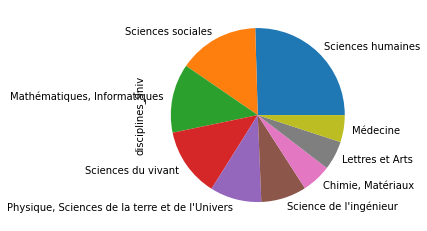

In [11]:
data["disciplines_9niv"].value_counts().plot(kind="pie")

C'est pas top. Et pas publiable.

On peut tenter un peu mis en forme avec la bibliothèque "de base" Matplotlib dont il faut comprendre la grammaire

[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]


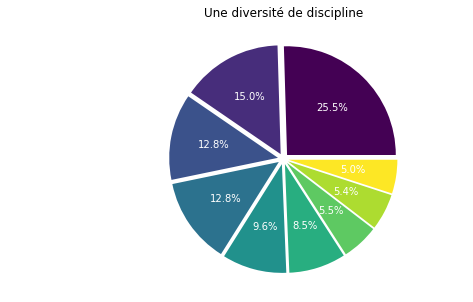

In [12]:
# Importer l'API
import matplotlib.pyplot as plt

# Définir l'écart entre les parts (c'est à nous de définir)
exp = [0.05] * len(data["disciplines_9niv"].dropna().unique())
print(exp)

# Graphique avec options (passé un peu de temps à chercher)
data["disciplines_9niv"].value_counts().plot(kind="pie",
                                             cmap="viridis", figsize=(5,5),
                                             explode=exp, autopct='%1.1f%%', textprops={'color':"w"})
# Finaliser et sauvegarder
plt.ylabel("")
plt.title("Une diversité de discipline")
plt.savefig("Mon graphique.png",bbox_inches='tight')

Il est possible d'aller plus loin. La même en dynamique avec Plotly : plus d'options de visualisation, etc. (ça ne s'affiche pas sur Github)

In [13]:
# Installer et importer une nouvelle bibliothèque !pip install plotly
import plotly.express as px

# Permettre l'affichage dans les slides
import plotly
plotly.offline.init_notebook_mode(connected=True)

# Afficher et compléter
df = pd.DataFrame(data["disciplines_9niv"].value_counts()) # Construction des données
fig = px.pie(df,names=df.index,values="disciplines_9niv", title='Une diversité de discipline')
fig.update_layout(font_family="Courier New", font_color="blue", title_font_family="Times New Roman",
                  title_font_color="orange", title_font_size=30)
fig.show()

Aller plus loin : paramétrer chaque élément affiché, etc.

## 3. Nouveaux résultats

Une fois que les données sont chargées, il est non seulement possible de refaire le traitement du rapport mais aussi d'aller plus loin. C'est la beauté de la science ouverte -> chercher nos propres résultats

### 3.1 Nouvelles explorations

Une réflexion : de quelles générations sont les répondants (notre échantillon n'étant pas représentatif, on va se retrouver avec des données "structurées" des personnes se sentant "concernées", ce qui nous indique aussi des anciennetés de réflexion sur les questions du numérique

<AxesSubplot:title={'center':'annee_premiere_publi'}, xlabel='disciplines_9niv'>

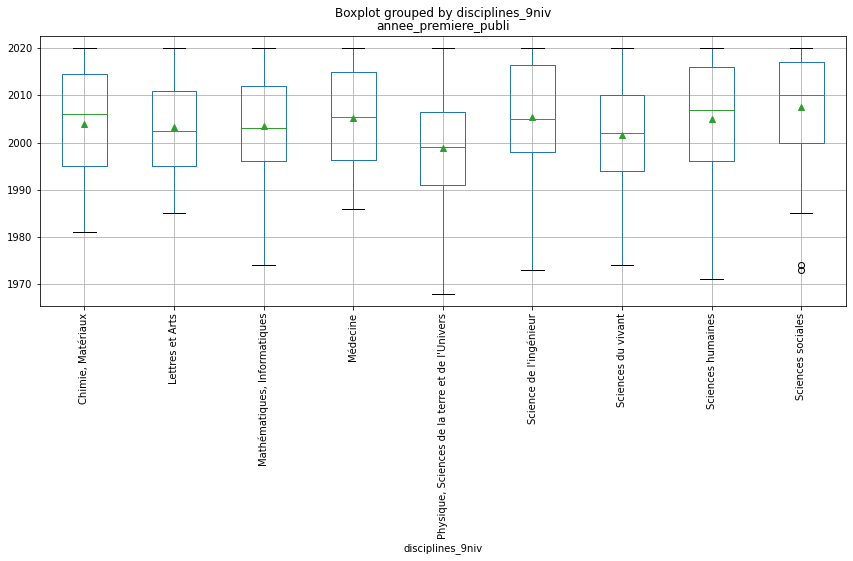

In [14]:
data.boxplot(column='annee_premiere_publi',by='disciplines_9niv',
             figsize=(14,5),rot=90,showmeans=True)


Possibilité même de faire quelque chose de plus joli avec Seaborn (une autre bibliothèque graphique)

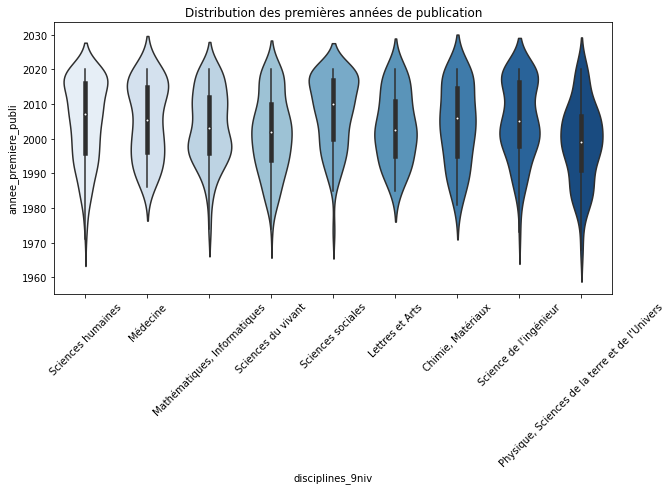

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,5))
sns.violinplot(x="disciplines_9niv", y="annee_premiere_publi", data=data,ax=ax, palette="Blues")
plt.xticks(rotation=45)
plt.title("Distribution des premières années de publication")
plt.show()

### 3.1 Une question précise : usage de R & de Python

Se concentrer sur les champs explicites d'un logiciel qui désigne le processus de travail

- logiciel_production_donnees
- outils_nettoyage
- Outils_analyses
- Outils_visualisation

(remarque en passant -> le nom des variables pourrait être mieux normalisé)

Opérations  que nous souhaitons faire

1. Regrouper les champs
2. Détecter la présence

Faire une analyse des principales réponses et construire une heuristique de détection : facile pour Python ou Excel, difficile pour R...

In [16]:
# Définir la liste des colonnes concernées
var = ["logiciel_production_donnees","outils_nettoyage","Outils_analyses","Outils_visualisation"]

#Regrouper toutes les informations dans un seul champ
data["outils"] = data[var].fillna("").apply(' '.join, axis=1)
#data["outils"] = data.apply(lambda x : " ".join([x[i] for i in var if pd.notnull(x[i])]),axis=1)

data["outils"] = data["outils"].replace({"":None})

In [17]:
data["outils"].value_counts()

Word                                                                                                                          13
Aucun                                                                                                                          6
word                                                                                                                           5
Excel                                                                                                                          4
aucun                                                                                                                          4
                                                                                                                              ..
word, excel, filmaker, qgis, photoscan                                                                                         1
J'utilise mes propres codes.\nParfois octave ou matlab. Mes propres codes\ngawk Mes propres outil

Définition d'heuristiques de détection (à améliorer potentiellement) pour détecter la présence : c'est la cuisine... et il vaut mieux connaître ses données pour cela

In [18]:
data["outils_R"] = data["outils"].str.contains("R,| R|R |\nR|R | r | r,|,r ")
data["outils_Python"] = data["outils"].str.lower().str.contains("python|pyton")
data["outils_Excel"] = data["outils"].str.lower().str.contains("excel|exel")
data["outils_Word"] = data["outils"].str.lower().str.contains("word")
data["outils_Matlab"] = data["outils"].str.lower().str.contains("matlab")

Création d'un tableau exploratoire

In [19]:
pyshs.tri_a_plat(data,"outils_R")

,Effectif,Pourcentage (%)
False,816.0,74.9
True,273.0,25.1
Total,1089.0,100.0


Explorer aussi visuellement

<AxesSubplot:title={'center':'Usage Excel'}>

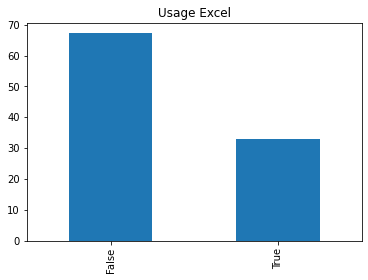

In [20]:
pyshs.tri_a_plat(data,"outils_Excel")["Pourcentage (%)"].drop("Total").plot(kind="bar",title="Usage Excel")

Tableau un peu plus finalisé : créer la structure de données et la transformer en tableau (magie de Pandas)

In [21]:
outils = {
"Excel":pyshs.tri_a_plat(data,"outils_Excel"),
"R":pyshs.tri_a_plat(data,"outils_R"),
"Python":pyshs.tri_a_plat(data,"outils_Python"),
"Matlab":pyshs.tri_a_plat(data,"outils_Matlab"), 
         }

tab = pd.concat(outils,axis=1)
tab

Excel                        R                   Python  \
      Effectif Pourcentage (%) Effectif Pourcentage (%) Effectif   
False    732.0            67.2    816.0            74.9    921.0   
True     357.0            32.8    273.0            25.1    168.0   
Total   1089.0           100.0   1089.0           100.0   1089.0   

                        Matlab                  
      Pourcentage (%) Effectif Pourcentage (%)  
False            84.6    975.0            89.5  
True             15.4    114.0            10.5  
Total           100.0   1089.0           100.0

Tableau croisé

In [22]:
pyshs.tableau_croise(data,"disciplines_9niv","outils_Python")

,False,True,Total
"Chimie, Matériaux",55 (93.2%),4 (6.8%),59 (100%)
Lettres et Arts,54 (93.1%),4 (6.9%),58 (100%)
"Mathématiques, Informatiques",94 (68.1%),44 (31.9%),138 (100%)
Médecine,48 (88.9%),6 (11.1%),54 (100%)
"Physique, Sciences de la terre et de l'Univers",60 (58.3%),43 (41.7%),103 (100%)
Science de l'ingénieur,59 (64.8%),32 (35.2%),91 (100%)
Sciences du vivant,125 (90.6%),13 (9.4%),138 (100%)
Sciences humaines,260 (94.9%),14 (5.1%),274 (100%)
Sciences sociales,153 (95.0%),8 (5.0%),161 (100%)
Total,908 (84.4%),168 (15.6%),1076 (100%)


Création d'une visualisation

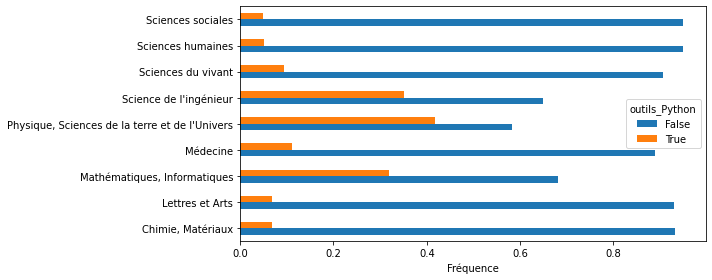

In [23]:
pd.crosstab(data["outils_Python"],data["disciplines_9niv"],
            normalize="columns").T.plot(kind="barh",figsize=(10,4))

# compléter et sauvegarder la figure
plt.ylabel("")
plt.xlabel("Fréquence")
plt.tight_layout()
plt.savefig("fig.png",dpi=300)

#### Visualisation juxtaposée (un peu) finalisée avec la grammaire des figures de Matplotlib (grille de figures, etc.)

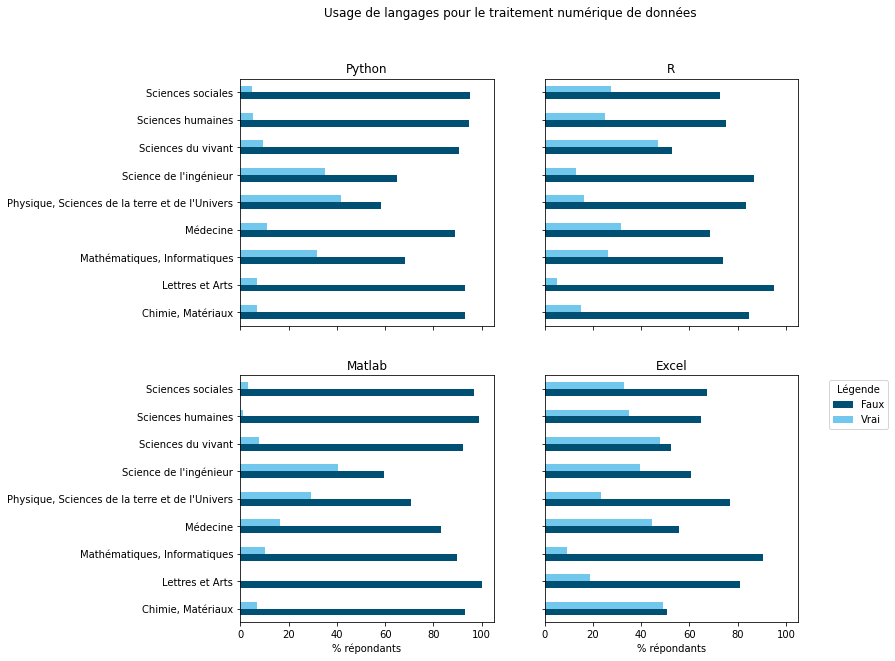

In [24]:
info = {"Python":"outils_Python","R":"outils_R","Matlab":"outils_Matlab","Excel":"outils_Excel"}
fig,ax = plt.subplots(2,2,figsize=(10,10),sharey=True,sharex=True)
plt.suptitle("Usage de langages pour le traitement numérique de données")
for graph,i in zip(ax.flatten(),info):
    tab = (100*pd.crosstab(data[info[i]],data["disciplines_9niv"],normalize="columns"))
    tab.T.plot(kind="barh",ax=graph, legend=False,color=["#005073","#71c7ec"])    
    graph.set_ylabel("")
    graph.set_xlabel("% répondants")
    graph.set_title(i)
plt.legend(title='Légende',labels=["Faux","Vrai"], bbox_to_anchor=(1.1, 1), loc='upper left')
plt.savefig("fig.png",dpi=300,bbox_inches='tight')

### 3.2 Allez plus loin


#### Modèle : régression logistique

Les facteurs qui pèsent sur l'usage de Python

In [25]:
# Création d'une variable indicatrice 0/1
data["outils_Python_B"] = data["outils_Python"].replace({True:1,False:0}).fillna(0)

# Mettre en forme les données pour éviter certains formats qui font des bugs
data["annee"] = data["annee_de_naissance-recod10niv"]

# Définition des variables indépendantes
var_ind = {"sexe":"Genre","disciplines_9niv":"Discipline","annee":"Age"}

# Calculer le modèle
pyshs.regression_logistique(data,"outils_Python_B",var_ind)

Odds Ratio        p  \
Variable   Modalité                                                             
.Intercept                                                      0.09  0.001**   
Age        25 à 30 ans                                           ref            
           31 à 35 ans                                          0.87    0.717   
           36 à 40 ans                                          1.19      0.6   
           41 à 45 ans                                          0.67    0.249   
           46 à 50 ans                                          0.59    0.131   
           51 à 55 ans                                          0.46    0.051   
           56 à 60 ans                                          0.48    0.076   
           61 à 65 ans                                          0.14  0.004**   
           66 ans et plus                                       0.24    0.083   
           moins de 25 ans                                      1.01    0.986   
Discipline Chimie, Matériaux                                     ref            
           Lettres et Arts                                      1.14    0.857   
           Mathématiques, Informatiques                         7.17   0.0***   
           Médecine                                             1.73    0.424   
           Physique, Sciences de la terre et de l'Univers      12.39   0.0***   
           Science de l'ingénieur                                7.7   0.0***   
           Sciences du vivant                                   1.66    0.402   
           Sciences humaines                                    0.79    0.686   
           Sciences sociales                                    0.71    0.589   
Genre      je ne souhaite pas répondre                           ref            
           un homme                                             1.01    0.988   
           une femme                                            1.28    0.627   

                                                                       IC 95%  
Variable   Modalité                                                            
.Intercept                                                   0.09 [0.02-0.36]  
Age        25 à 30 ans                                                         
           31 à 35 ans                                       0.87 [0.42-1.81]  
           36 à 40 ans                                       1.19 [0.62-2.30]  
           41 à 45 ans                                       0.67 [0.34-1.32]  
           46 à 50 ans                                       0.59 [0.30-1.17]  
           51 à 55 ans                                       0.46 [0.21-1.00]  
           56 à 60 ans                                       0.48 [0.21-1.08]  
           61 à 65 ans                                       0.14 [0.04-0.54]  
           66 ans et plus                                    0.24 [0.05-1.20]  
           moins de 25 ans                                   1.01 [0.36-2.81]  
Discipline Chimie, Matériaux                                                   
           Lettres et Arts                                   1.14 [0.27-4.88]  
           Mathématiques, Informatiques                     7.17 [2.41-21.34]  
           Médecine                                          1.73 [0.45-6.60]  
           Physique, Sciences de la terre et de l'Univers  12.39 [4.09-37.55]  
           Science de l'ingénieur                           7.70 [2.52-23.51]  
           Sciences du vivant                                1.66 [0.51-5.37]  
           Sciences humaines                                 0.79 [0.25-2.51]  
           Sciences sociales                                 0.71 [0.20-2.47]  
Genre      je ne souhaite pas répondre                                         
           un homme                                          1.01 [0.37-2.71]  
           une femme                                         1.28 [0.48-3.43]


####  Réaliser une analyse en composantes principales (ACM)

Création du tableau des données

In [26]:
X = data[["outils_R","outils_Excel","outils_Word","outils_Matlab","outils_Python"]]
X = X.replace({True:"Oui",False:"Non"}).fillna("Non")
X

,outils_R,outils_Excel,outils_Word,outils_Matlab,outils_Python
0,Non,Non,Non,Non,Non
1,Non,Oui,Oui,Non,Non
2,Non,Non,Non,Non,Non
3,Non,Oui,Non,Non,Non
4,Oui,Oui,Non,Non,Non
...,...,...,...,...,...
1084,Non,Oui,Non,Non,Non
1085,Non,Non,Non,Non,Non
1086,Non,Non,Non,Non,Non
1087,Non,Non,Non,Non,Non


Calcul de la MCA avec la bibliothèque Prince

In [27]:
# pip install prince
import prince
mca = prince.MCA(n_components=2)
mca = mca.fit(X)
mca.row_coordinates(X)

,0,1
0,0.021333,-0.359769
1,-1.089833,-0.026748
2,0.021333,-0.359769
3,-0.374549,0.194350
4,-0.214955,0.982248
...,...,...
1084,-0.374549,0.194350
1085,0.021333,-0.359769
1086,0.021333,-0.359769
1087,0.021333,-0.359769


Un peu de travail à la main : calcul des coordonnées de variables supplémentaires

In [28]:
t = mca.row_coordinates(X)
t["dis"] = data["disciplines_9niv"]
disciplines = pd.concat({"X":t.groupby("dis")[0].mean(),"Y":t.groupby("dis")[1].mean()},axis=1)
disciplines

,X,Y
dis,,
"Chimie, Matériaux",-0.169998,0.010784
Lettres et Arts,-0.329804,-0.324969
"Mathématiques, Informatiques",0.305608,-0.111678
Médecine,0.019826,0.153543
"Physique, Sciences de la terre et de l'Univers",0.408754,-0.069380
Science de l'ingénieur,0.343437,0.030429
Sciences du vivant,-0.036131,0.270815
Sciences humaines,-0.191850,-0.021337
Sciences sociales,-0.176285,-0.009664


Représentation

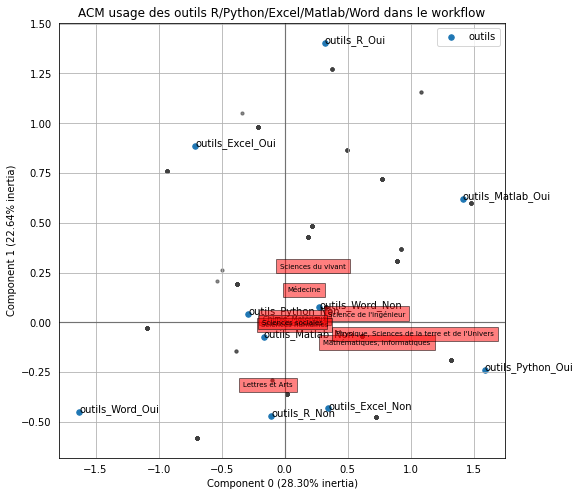

In [29]:
ax = mca.plot_coordinates(X=X,figsize=(8, 8),show_row_points=True,
                             row_points_size=10,show_column_points=True,
                             column_points_size=30,show_column_labels=True,legend_n_cols=1)

# Ajout d'éléments sur les variables indépendantes
for i,j in disciplines.iterrows():
    ax.text(j["X"],j["Y"],i, fontsize=7, bbox={"facecolor":'red', "alpha":0.5})
    
plt.title("ACM usage des outils R/Python/Excel/Matlab/Word dans le workflow")
plt.show()

## Forces et faiblesses de Python

### Forces

- Formaliser la démarche
- Support Jupyter ++ pour le travail collaboratif
- Code réexcutable et donc travail collaboratif
- Des outils très puissants qui permettent la souplesse
- Sortir de la dépendance d'un logiciel (Sphinx initialement)

### Faiblesses

- Manque d'exemple -> beaucoup de petites recherches sur internet pour le faire
- Cout d'entrée pour son propre code : découvrir les bibliothèques, etc.
- Manque de bibliothèques SHS
- Un travail "caché" : chercher les bonnes manières de faire, etc. difficile à montrer + beaucoup de temps à passer à retrouver les bonnes options (je connais pas tout par coeur...)
- Une ergonomie qui peut être moindre qu'un logiciel dédié

### Python ou R ?

- Deux solutions possibles (toujours le même débat)

## Aller plus loin

- Générer une application avec `Streamlite` : `streamlit run streamlit-test.py`